In [1]:
# %matplotlib inline
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt

from utils import *

mpl.rcParams.update(rcParams)

In [2]:
%%bash
cd .. && make clean && make

In file included from src/Exercice5_students.cpp:7:
src/ConfigFile.tpp:67:8: warning: variable 'out' is used uninitialized whenever 'if' condition is false [-Wsometimes-uninitialized]
  if ( val != configMap.end() ) {
       ^~~~~~~~~~~~~~~~~~~~~~
src/Exercice5_students.cpp:163:33: note: in instantiation of function template specialization 'ConfigFile::get<double>' requested here
        const double tfin = configFile.get<double>("tfin");
                                       ^
src/ConfigFile.tpp:74:10: note: uninitialized use occurs here
  return out;
         ^~~
src/ConfigFile.tpp:67:3: note: remove the 'if' if its condition is always true
  if ( val != configMap.end() ) {
  ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
src/ConfigFile.tpp:66:8: note: initialize the variable 'out' to silence this warning
  T out;
       ^
        = 0.0
src/ConfigFile.tpp:67:8: warning: variable 'out' is used uninitialized whenever 'if' condition is false [-Wsometimes-uninitialized]
  if ( val != configMap.end() ) 

In [3]:
config_name = 'corail2'
conf = load_conf(config_name)
print(conf['xb'] - conf['xa'])

400000.0


In [4]:
# params, data_x, data_v, data_f
dataset = run_with_params(
    config_name,
    gen_variations({
        'xa': [conf['xb']-100e3, conf['xb']-50e3],
    })
)

[ConfigFile] Ligne sans '=' : "# Physique :"
[ConfigFile] Ligne sans '=' : "# Physique :"


Running simulations... Done 2/2


# Plots!

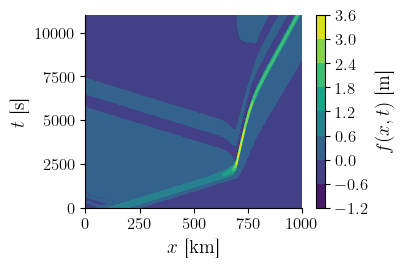

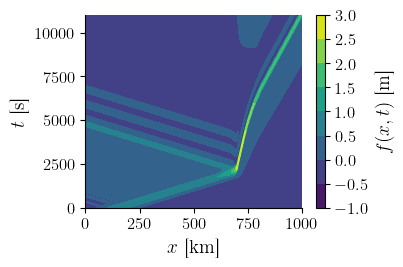

In [6]:
%matplotlib inline

for params, x, vitesse, f, h0 in dataset:
    plt.figure(figsize=(3.5, 2.5))
    X, Y = np.meshgrid(x/1e3, f[:,0])
    plt.contourf(X, Y, f[:,1:], cmap=plt.get_cmap('viridis'))
    plt.colorbar().set_label(r'$f(x,t)$ [m]')
    plt.xlabel(r'$x$ [km]')
    plt.ylabel(r'$t$ [s]')
    xa = params['xa']
    plt.savefig(export_path + f'corail_eq1_movement_xa={xa:.0f}.pdf')
    plt.show()

# plt.savefig(export_path + 'corail_vague.pdf')

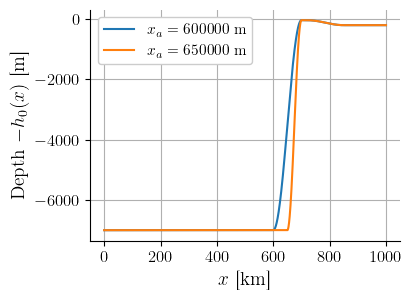

In [7]:
for params, x, vitesse, f, h0 in dataset:
    xa = params['xa']
    plt.plot(x/1e3, -h0, label=f'$x_a={xa:.0f}$ m')
plt.xlabel(r'$x$ [km]')
plt.ylabel(r'Depth $-h_0(x)$ [m]')
plt.legend()
plt.grid()
plt.savefig(export_path + 'corail_eq1_depth_var_xa.pdf')

In [ ]:
# # Do your stuff here pwease
# %matplotlib qt
# import matplotlib.animation as mpla

# plt.figure(figsize=(8, 8))

# params, x, vitesse, f, h0 = dataset[-1]
# plt.fill_between(x, -h0, -conf['hL'], color='xkcd:sand')
# line, = plt.plot(x, f[0,1:], 'x-', markersize=5)
# size = f.shape[0]

# def animate(i) -> Any:
#     idx = i % size
#     line.set_data(x, f[idx,1:])


# anim = mpla.FuncAnimation(plt.gcf(), animate, interval=20, cache_frame_data=True, frames=size)

# plt.xlabel(r'$x$ [m]')
# plt.ylabel(r'$y$ [m]')
# plt.ylim(-3, 3)
# plt.grid()
# plt.show()
# # anim.save('yeet.gif')

In [ ]:
# # Do your stuff here pwease
# %matplotlib qt
# from ipywidgets import interactive

# fig = plt.figure(figsize=(8, 8))

# params, x, vitesse, f, h0 = dataset[-1]
# plt.fill_between(x, -h0, -conf['hL'], color='xkcd:sand')
# size = f.shape[0]
# print(f[len(f)-1,0])
# def update(t = 0) -> Any:
#     with mpl.rc_context({'text.usetex': False}):
#         plt.gca().clear()
#         plt.plot(x, f[t,1:], 'x-', markersize=5)
#         idx_x_max = np.argmax(f[t,1:])
#         plt.axvline(x[idx_x_max])
#         plt.text(0.2, 2.5, f'h={f[t,idx_x_max+1]}')
#         plt.xlabel(r'$x$ [m]')
#         plt.ylabel(r'$y$ [m]')
#         plt.ylim(-3, 3)
#         plt.grid()
#         plt.show()

# interactive_plot = interactive(update, t=(0,f.shape[0]-1,1))
# interactive_plot

In [ ]:
plt.close()

In [ ]:
%matplotlib inline
actual_t = [None for _ in range(len(dataset))]
amplitudes = [None for _ in range(len(dataset))]
idx_x_max = [None for _ in range(len(dataset))]
sel_x = [None for _ in range(len(dataset))]
for idx, (params, x, vitesse, f, h0) in enumerate(dataset):
    h = f[:,1:]
    t = f[:,0]
    idx_x_max[idx] = np.argmax(h, axis=1)
    sel_x[idx] = x[idx_x_max[idx]]

    actual_t[idx] = np.copy(t)
    amplitudes[idx] = np.zeros(len(t))
    k = 3
    for i in range(len(t)):
        coefs = np.polyfit(t[max(0,i-k):i+k+1], h[max(0,i-k):i+k+1, idx_x_max[idx][i]], 2)
        fitfunc = np.poly1d(coefs)
        res = sc.optimize.minimize(lambda t: -fitfunc(t), 0, options={'disp': False})
        actual_t[idx][i] = res.x[0]
        amplitudes[idx][i] = -res.fun
    # amplitudes[idx][0] = amplitudes[idx][1]
    # amplitudes[idx][-1] = amplitudes[idx][-2]

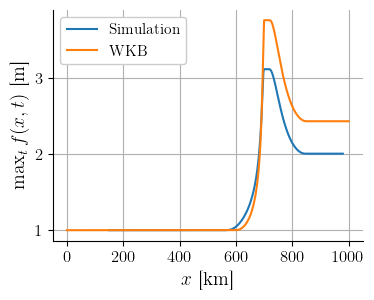

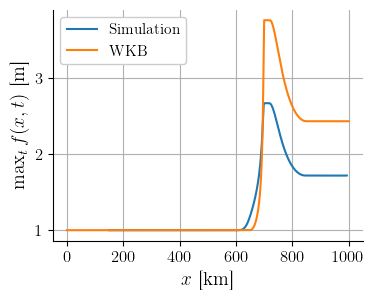

In [ ]:
%matplotlib inline
for idx, (params, x, vitesse, f, h0) in enumerate(dataset):
    plt.plot(sel_x[idx]/1e3, amplitudes[idx], label='Simulation')
    # plt.plot(sel_x[idx], f[:,1:].flatten()[np.arange(len(f)) * (f.shape[1]-1) + idx_x_max[idx]], label='Rough')
    # plt.scatter(sel_x[idx], amplitudes[idx], c=np.arange(len(sel_x[idx])), cmap='viridis', label='Simulation')
    plt.plot(x/1e3, conf['A'] * (h0/conf['hL'])**(-1/4), label='WKB')
    plt.xlabel(r'$x$ [km]')
    plt.ylabel(r'$\max_t f(x,t)$ [m]')
    plt.legend()
    plt.grid()
    plt.savefig(export_path + f'corail_eq1_amplitude_xa={params['xa']}.pdf')
    plt.show()

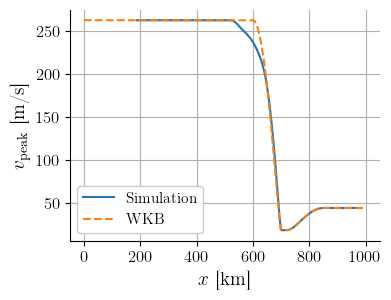

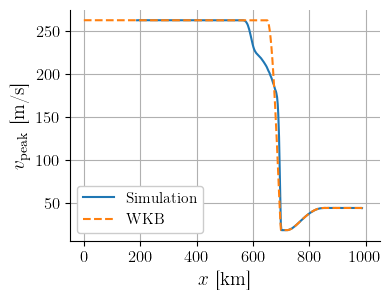

In [ ]:
for idx, (params, x, vitesse, f, h0) in enumerate(dataset):
    k = 16
    vcalc = (sel_x[idx][2*k:] - sel_x[idx][:-2*k]) / (actual_t[idx][2*k:] - actual_t[idx][:-2*k])
    plt.plot(x[idx_x_max[idx]][k:-k]/1e3, vcalc, label=f'Simulation')
    vth = np.sqrt(9.81 * h0)
    plt.plot(x/1e3, vth, '--', label='WKB')
    plt.xlabel(r'$x$ [km]')
    plt.ylabel(r'$v_\textrm{peak}$ [m/s]')
    plt.legend()
    plt.grid()
    plt.savefig(export_path + f'corail_eq1_vitesse_xa={params['xa']}.pdf')
    plt.show()